![Curso de Visión Artificial](imagenes/encabezado.png)




# Filtros NO Lineales

Los filtros no lineales por excelencia son 3: la mediana, el mínimo y el máximo. Este tipo de filtros, también conocidos como filtros de orden estadístico, reemplazan el píxel central del kernel de convolución por la mediana, el máximo o el mínimo valor entre los valores que cubre la ventana en la imagen original.

Veamos como utilizar estos filtros en `Skimage`:

In [1]:
# Siempre que usemos matplotlib en Jupyter es necesario poner esta línea antes de cualquier otra
%matplotlib inline

# Importamos las bibliotecas necesarias y les asigamos un alias
import skimage                           # Biblioteca para la manipulación de imágenes
import numpy as np                       # Biblioteca para la manipulación de matrices

# Importamos algunos paquetes específicos
from matplotlib import pyplot as plt     # Biblioteca para crear graficas y mostrar las imágenes en pantalla

from skimage import data                 # Paquete con imágenes de prueba
from skimage import io                   # Paquete para lectura/escritura de imágenes
from skimage import color                # Paquete con las operaciones de transformaciones entre espacios de color
from skimage import exposure             # Paquete con las funciones para calcular y alterar el histograma
from skimage import filters              # Paquete que contiene las máscaras y filtros de suavizado y realzado
from skimage import util                 # Paquete que contiene las funciones para cambiar el tipo de dato de las imágenes

from scipy import ndimage                # Usamos esta biblioteca para realizar la operación de convolución

import skdemo                            # Paquete ESPECIAL ADJUNTO con algunas funciones extra de visualización

##################

from skimage import morphology           # Para crear el kernel de convolución en los filtros no lienales

# Con este nos aseguramos que las imagenes en niveles de gris, se vean como tal siempre.
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'none'


## Filtro Mediana

Este es uno de los filtros más usados para suavizar una imagen dado que preserva los bordes de la misma mientras elimina el ruido.

Al igual que con los filtros espaciales tradicionales, el filtro mediana centra el kernel de convolución en cada pixel de la misma, reemplazando su valor por la mediana entre todos los valores que cubre el kernel. Este filtro funciona muy bien para eliminar el ruido, especialmente el ruido de tipo impulsivo. El siguiente ejemplo muestra cómo usar el filtro mediana en una imagen con ruido "sal y pimienta". Además, la imagen se filtra usando un filtro gaussiano para fines de comparación.


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


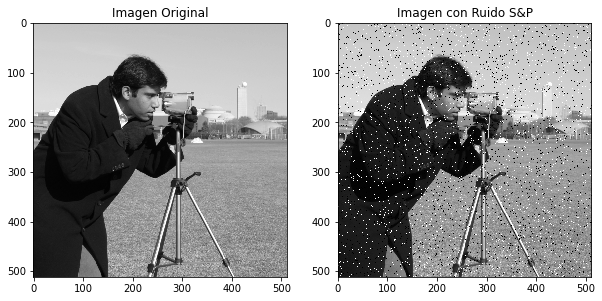

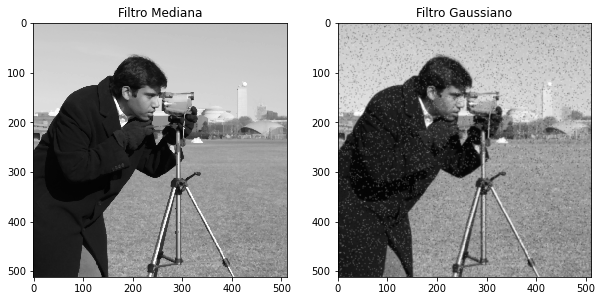

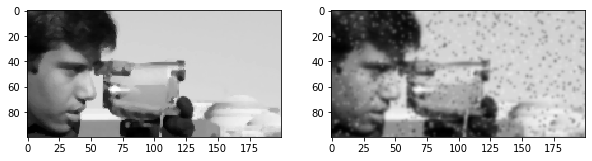

In [2]:
# Cargamos la imagen y le agregamos ruido
img = skimage.img_as_ubyte(data.camera())
img_noisy = util.random_noise(img, "s&p")

# Mostramos las imágenes
skdemo.imshow_all(img, img_noisy, titles=["Imagen Original", "Imagen con Ruido S&P"])

# Kernel de convolución
k = morphology.square(3)

# Se aplica el filtro mediana
img_median = filters.rank.median(img_noisy, k)

# Se aplica el filtro gaussiano
img_gauss = filters.gaussian(img_noisy, sigma=1.0)

skdemo.imshow_all(img_median, img_gauss, titles=["Filtro Mediana", "Filtro Gaussiano"]);

#Visualizando los detalles
skdemo.imshow_all(img_median[100:200, 200:400], img_gauss[100:200, 200:400]);


## Filtro Máximo

Este tipo de filtro reemplaza el píxel central del kernel con el píxel más claro (valor máximo de intensidad) de entre los píxeles en el kernel.


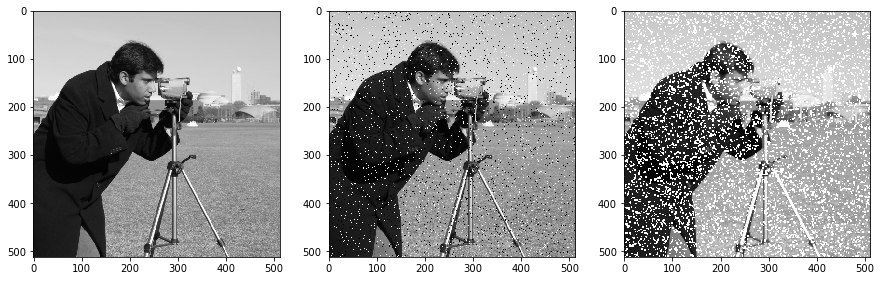

In [3]:
# Aplicamos el filtro máximo
img_max = filters.rank.maximum(img_noisy, k)

# Visualizamos la matriz de la imagen
skdemo.imshow_all(img, img_noisy, img_max)

Como se puede observar, el filtro máximo aclara la imagen. Sin embargo, este filtro no suele ser una buena opción para eliminar el ruido sal ya que empeora dicho ruido en la imagen.

Veamos un ejemplo con otra imagen ...


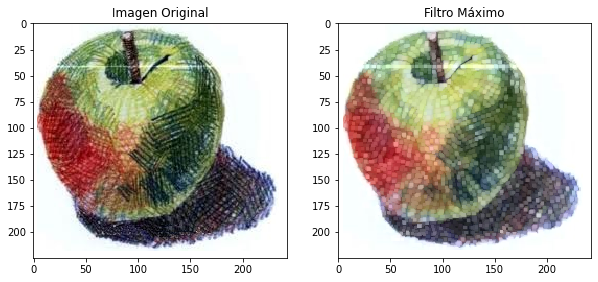

In [4]:
# Leemos la imagen
img_manzana = io.imread("imagenes/CloseF.png")

# Aplicamos el filtro máximo a cada canal
R = filters.rank.maximum(img_manzana[:,:,0], k)
G = filters.rank.maximum(img_manzana[:,:,1], k)
B = filters.rank.maximum(img_manzana[:,:,2], k)

# Componemos la imagen RGB en la imagen de salida
img_manzana_max = color.gray2rgb(R)
img_manzana_max[:,:,1] = G
img_manzana_max[:,:,2] = B

# Visualizamos las imágenes
skdemo.imshow_all(img_manzana, img_manzana_max, titles=["Imagen Original", "Filtro Máximo"]);


### Filtro Mínimo

Este tipo de filtro reemplaza el píxel central del kernel con el píxel más oscuro (valor mínimo de intensidad) de entre los píxeles en el kernel.

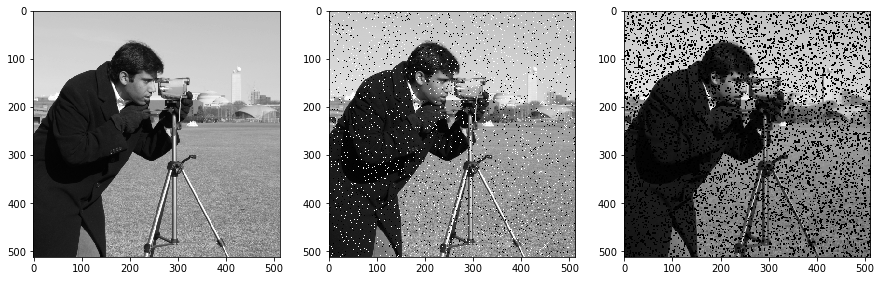

In [5]:
# Aplicamos el filtro mínimo
img_min = filters.rank.minimum(img_noisy, k)

# Visualizamos la matriz de la imagen
skdemo.imshow_all(img, img_noisy, img_min)


Contrario al filtro máximo, el filtro mínimo oscurece la imagen. También se debe notar que este tipo de filtro no es bueno para eliminar el ruido tipo pimienta en una imagen, pues al tomar el valor mínimo del kernel, se agudiza el ruido.

Veamos ahora la aplicación del filtro mínimo en la imagen de la manzana. Observe y compare las imágenes de resultado.


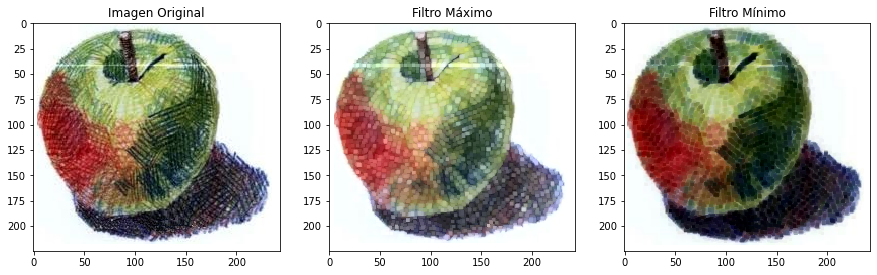

In [6]:
# Aplicamos el filtro máximo a cada canal
R = filters.rank.minimum(img_manzana[:,:,0], k)
G = filters.rank.minimum(img_manzana[:,:,1], k)
B = filters.rank.minimum(img_manzana[:,:,2], k)

# Creamos la imagen RGB a partir del canal R
img_manzana_min = color.gray2rgb(R)
img_manzana_min[:,:,1] = G
img_manzana_min[:,:,2] = B

# Visualizamos las imágenes
skdemo.imshow_all(img_manzana, img_manzana_max, img_manzana_min, titles=["Imagen Original", "Filtro Máximo", "Filtro Mínimo"]);


# Espacios de Color


Aunque el espacio de color RGB es bastante fácil de entender, cuando este se desea usar para detectar un color específico (que no sea rojo, verde o azul) puede ser doloroso. 

En las tareas específicas de visión artificial en las que el color juega un papel importante, se suelen usar otros espacios de color en los que se usa un solo componente para la intensidad (luminancia o luminosidad) de los píxeles y dos componentes adicionales para representar el color, como por ejemplo en los canales tono y saturación de los espacios  [HSL y HSV] (http://en.wikipedia.org/wiki/HSL_and_HSV)).

`Skimage` provee diferentes funciones para convertir una imagen en RGB a otros espacios de color. Estas funciones se encuentran en el paquete `color` de `skimage`.


In [7]:
# Leemos una de las imágenes de prueba de la practica
color_image = io.imread('imagenes/balloon.jpg')

# Pasamos la imagen al espacio de color Lab: L=luminancia, a y b definen el color real o tono
lab_image = color.rgb2lab(color_image)
lab_image.shape

(300, 225, 3)

Observe que al cambiar el espacio de color, las dimensiones de la imagen no cambian en absoluto. Sin embargo, visualicemos la imagen ...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


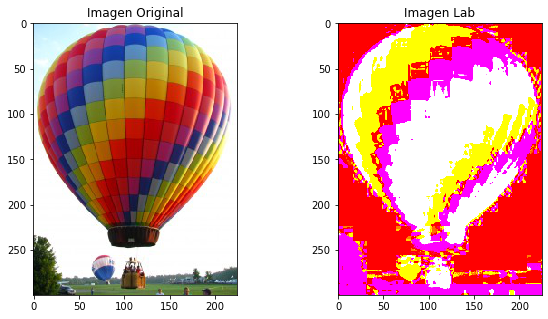

In [8]:
skdemo.imshow_all(color_image, lab_image, titles=["Imagen Original", "Imagen Lab"])

La función imshow visualiza una imagen en RGB, sin embargo, las matrices de la imagen en el espacio Lab no se parecen en nada a las matrices de una imagen RGB.

Dicho esto, hay un cierto parecido con la imagen en RBG. Observe, la información de cada canal:


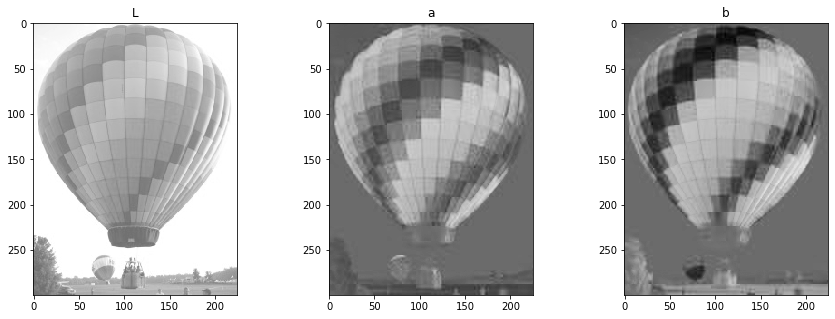

In [9]:
skdemo.imshow_all(lab_image[..., 0], lab_image[..., 1], lab_image[..., 2],
                 titles=['L', 'a', 'b'])

Parte de la gama de colores RGB en el espacio Lab se pueden visualizar a continuación, para valores específicos de luminancia. Note que la información de color es más uniforme en el espacio Lab que en el espacio RGB. Es más, estos se aproximan más a la forma como el ojo humano percibe los colores.

![LAB](imagenes/Lab.png)

Image <a href="https://commons.wikimedia.org/wiki/File:Lab_color_space.svg">Licencia CC BY-SA by Jacob Rus</a>

En `Skimage` las funciones para los espacios de color son las siguientes:
* rgb2yiq: Convierte de RGB a YIQ
* rgb2yuv: Convierte de RGB a YUV
* rgb2hsv:  Convierte de RGB a HSV
* rgb2xyz: Convierte de RGB a XYZ de CIE-1931
* rgb2lab: Convierte de RGB a L*a*b* de CIE-1976
* rgb2ycbcr: Convierte de RGB al espacio YCbCr





# Entregable de la Práctica


### Ejercicio 1. Filtros No Lineales

Como se explicó en la práctica anterior, la detección de arroces en la imagen rice.png se puede hacer con base en una estimación del fondo de la imagen.

Desarrolle lo siguiente:
1. Estime el fondo de la imagen usando un filtro mediana con diferentes tamaños de ventana (entre 3 y 55 px), muestre los resultados obtenidos y determine cuál es la mejor explicando el por qué. 

2. Responda a la siguiente pregunta explicando su respuesta: ¿Hay alguna relación entre el tamaño de la ventana y el tamaño de los objetos que se quieren mantener en la imagen?. 

3.	Compare los resultados obtenidos con los de la práctica anterior. ¿Por qué el filtro Gaussinano no funcionó del todo bien en esa práctica? 

4.	Intente hacer los mismo con el filtro máximo y el filtro mínimo. ¿Son útiles para este fin?, si es así pruebe con diferentes tamaños de máscaras y compare los resultados con la segmentación usando el filtro mediana.

5.	Utilice la misma metodología descrita en el párrafo anterior para detectar los defectos en la imagen Wheel.bmp. ¿Qué problemas encontró al realizar el ejercicio? ¿Se pudieron aislar solo los defectos?, ¿por qué sí o por qué no? Describa los detalles.


In [ ]:
# Desarrollo del Ejercicio 1



### Ejercicio 2. Espacios de Color

Una de las formas para establecer la edad del pez gato (llamado también bagre) es a través del área que ocupa la arcada dental. Se requiere que usted desarrolle un método de **segmentación** en el que se aislé la zona de la arcada dental en el grupo de las 6 imágenes entregadas en la carpeta "imagenes/catfish/". Para realizar la segmentación se deben explorar las imágenes en los diferentes espacios de color: YIQ, YUV, HSV, Lab, YCbCr. 

Un ejemplo, de una segmentación ideal de la arcada se muestra a continuación.

![LAB](imagenes/arcada.png)

Con base en lo anterior:
1. Use los métodos de conversión de los diferentes espacios de color y muestre los canales de cada espacio para una de las imágenes dadas del pez gato determinada.
2. Explique: ¿Hay algún canal en el que la arcada dental pueda ser separada fácilmente del resto de la imagen, es decir, hay algún canal en el que el color de la arcada sea significativamente diferente al resto de la imagen?
3. Desarrolle y Explique: utilizando operaciones entre las imágenes en los diferentes canales, es posible segmentar (aislar) la arcada dental?
4. ¿Es posible llegar a una segmentación ideal de la aracad? ¿Por qué si o por qué no?

In [ ]:
# Desarrollo del Ejercicio 2



### Ejercicio 3. Espacios de Color

Los conos de tráfico son usados por guardas de tránsito y policía de carreteras, al igual que trabajadores de construcción, para bloquear ciertas zonas de las vías. A diferencia de las señales de tránsito permanentes, los conos no se pueden ubicar en los mapas digitales ya que no tienen una ubicación fija. Por lo tanto, se hace necesario un sistema de navegación por imágenes para detectarlos de forma automática. Para las imágenes en la carpeta "imagenes/conos/", use los diferentes espacios de color para tratar de “segmentar” los conos. Visualice las imágenes en diferentes espacios de color y compare los resultados. Explique con base en los resultados obtenidos y con sus evidencias respectivas: ¿En alguno de los espacios de color se pueden aislar estos objetos de interés en todas las imágenes?

La segmentación ideal de los conos se muestra a continuación:

![LAB](imagenes/conos.png)
    

In [ ]:
# Desarrollo del Ejercicio 3


